# Linear Regression

## Steps of LR
Understand the data and the problem
Clean Data - Missing Values, Transformation, 
Load Libraries
Data Setup - Train/Test, 
Create Model
View Statistics of Model
Predict, Check RMSE, Efficiency 
Check for Assumptions
- We are investigating a linear relationship
- All variables follow a normal distribution
- There is very little or no multicollinearity
- There is little or no autocorrelation
- Data is homoscedastic

### Method-1 : sklearn - linear_model

In [83]:
from sklearn import linear_model as lm
# from sklearn.linear_model import LinearRegression
from pydataset import data
import pandas as pd
import numpy as np

In [84]:
df = data('mtcars')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [85]:
df1 = df[['mpg','wt','hp']]
df1.head()

,mpg,wt,hp
Mazda RX4,21.0,2.620,110
Mazda RX4 Wag,21.0,2.875,110
Datsun 710,22.8,2.320,93
Hornet 4 Drive,21.4,3.215,110
Hornet Sportabout,18.7,3.440,175


Another way to split data into X, y

X, y = df[['wt', 'hp']], df.mpg

In [86]:
#IV and DVs
X = df1[['wt','hp']]
y = df1['mpg']
print(X.head(), '\n', y.head())


                      wt   hp
Mazda RX4          2.620  110
Mazda RX4 Wag      2.875  110
Datsun 710         2.320   93
Hornet 4 Drive     3.215  110
Hornet Sportabout  3.440  175 
 Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64


In [87]:
# Predict mpg on basis of wt & hp
lm1 = lm.LinearRegression()
lm1.fit(X,y)

LinearRegression()

In [88]:
# see output functions
#lm1. press tab button

In [89]:
# R2 value - coefficient of determination
lm1.score(X,y)
#82.67% of the variation in the response variable can be explained by the two predictor variables
# in the model. ie mpg can be predicted upto 82% on the basis of wt & hp

0.8267854518827914

In [90]:
# Coeficients 
lm1.coef_

array([-3.88, -0.03])

In [91]:
# Intercept
lm1.intercept_

37.227270116447215

In [92]:
# few values
print(X.head())
print(X.head(1)) # select this value and put in equation
print(y.head(1)) # this is actual mileage for above car

                      wt   hp
Mazda RX4          2.620  110
Mazda RX4 Wag      2.875  110
Datsun 710         2.320   93
Hornet 4 Drive     3.215  110
Hornet Sportabout  3.440  175
             wt   hp
Mazda RX4  2.62  110
Mazda RX4    21.0
Name: mpg, dtype: float64


In [93]:
# equation
#mpg =  37 + -3.7 * wt + -0.03 * hp
mpg1A  = 37 - 3.7 * 2.6 - .03 * 110   # Mazda Rx4
mpg1B = lm1.predict(X.head(1))
print('\n Input Values -', X.head(1), '\n Actual MPG -  ', y.head(1), '\n From Formula - ', mpg1A, '\n From Predict Function -', mpg1B)
print('\n Formula and Predict Function - Almost the same Value')
print('\n Difference Between Actual and Predicted Values - Residuals')


 Input Values -              wt   hp
Mazda RX4  2.62  110 
 Actual MPG -   Mazda RX4    21.0
Name: mpg, dtype: float64 
 From Formula -  24.08 
 From Predict Function - [23.57]

 Formula and Predict Function - Almost the same Value

 Difference Between Actual and Predicted Values - Residuals


In [94]:
#predict mpg based on linear equation on input values of X
lm1.predict(X)

array([23.57, 22.58, 25.28, 21.27, 18.33, 20.47, 15.60, 22.89, 21.99,
       19.98, 19.98, 15.73, 17.04, 16.85, 10.36, 9.36, 9.19, 26.60, 29.31,
       28.05, 24.59, 18.81, 19.14, 14.55, 16.76, 27.63, 26.04, 27.77,
       16.55, 20.93, 12.74, 22.98])

In [95]:
# see them together
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
np.column_stack((X,y, lm1.predict(X).round(2), y-lm1.predict(X)))

array([[2.62, 110.00, 21.00, 23.57, -2.57],
       [2.88, 110.00, 21.00, 22.58, -1.58],
       [2.32, 93.00, 22.80, 25.28, -2.48],
       [3.21, 110.00, 21.40, 21.27, 0.13],
       [3.44, 175.00, 18.70, 18.33, 0.37],
       [3.46, 105.00, 18.10, 20.47, -2.37],
       [3.57, 245.00, 14.30, 15.60, -1.30],
       [3.19, 62.00, 24.40, 22.89, 1.51],
       [3.15, 95.00, 22.80, 21.99, 0.81],
       [3.44, 123.00, 19.20, 19.98, -0.78],
       [3.44, 123.00, 17.80, 19.98, -2.18],
       [4.07, 180.00, 16.40, 15.73, 0.67],
       [3.73, 180.00, 17.30, 17.04, 0.26],
       [3.78, 180.00, 15.20, 16.85, -1.65],
       [5.25, 205.00, 10.40, 10.36, 0.04],
       [5.42, 215.00, 10.40, 9.36, 1.04],
       [5.34, 230.00, 14.70, 9.19, 5.51],
       [2.20, 66.00, 32.40, 26.60, 5.80],
       [1.61, 52.00, 30.40, 29.31, 1.09],
       [1.83, 65.00, 33.90, 28.05, 5.85],
       [2.46, 97.00, 21.50, 24.59, -3.09],
       [3.52, 150.00, 15.50, 18.81, -3.31],
       [3.44, 150.00, 15.20, 19.14, -3.94],
       [3

In [101]:
# MSE & RMSE 
import sklearn.metrics  #RMSE
import math
mse = sklearn.metrics.mean_squared_error(y, lm1.predict(X)) 
print("The difference between actual and predicted values : MSE- ", mse, " and MSE - ", round(math.sqrt(mse),2) )  

The difference between actual and predicted values : MSE-  6.095242335670815  and MSE -  2.47


In [102]:
#RMSE manually
error = (y - lm1.predict(X))**2  #per row
print(error.head())
sumerror = sum(error)
print("Sum of Square Error : SE - ", sumerror)
meansumerror = sumerror/X.shape[0]
print("Mean of Square Sum of Error : MSE (divide by no of rows)- ", meansumerror)
rootmeansumerror = meansumerror ** .5
print("Root Mean of Square Sum of Error : RMSE (square root of MSE)- ", rootmeansumerror)

Mazda RX4            6.616879
Mazda RX4 Wag        2.507417
Datsun 710           6.129678
Hornet 4 Drive       0.018220
Hornet Sportabout    0.138930
Name: mpg, dtype: float64
Sum of Square Error : SE -  195.0477547414661
Mean of Square Sum of Error : MSE (divide by no of rows)-  6.095242335670815
Root Mean of Square Sum of Error : RMSE (square root of MSE)-  2.4688544581790994


RMSE is a square root of value gathered from the mean square error function. It helps us plot a difference between the estimate and actual value of a parameter of the model.
Using RSME, we can easily measure the efficiency of the model.
A well-working algorithm is known if its RSME score of less than 180. If the RSME value surpasses 180, we need to apply feature selection and hyper-parameter tuning on the model parameter.

### Some Functions still missing
scikit-learn doesn’t offer many built-in functions to analyze the summary of a regression model since it’s typically only used for predictive purposes.
we still don’t know the overall F-statistic of the model, the p-values of the individual regression coefficients, and other useful metrics that can help us understand how well the model fits the dataset.

## Stats Model

In [47]:
import statsmodels.api as sm

In [103]:
#define response variable
y = df['mpg']

#define predictor variables
x = df[['wt', 'hp']]
print(x.head(), '\n', y.head())

                      wt   hp
Mazda RX4          2.620  110
Mazda RX4 Wag      2.875  110
Datsun 710         2.320   93
Hornet 4 Drive     3.215  110
Hornet Sportabout  3.440  175 
 Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64


In [104]:
#another way to show 2 dataframe in column way
pd.concat([x.head(), y.head()], axis=1)

,wt,hp,mpg
Mazda RX4,2.620,110,21.0
Mazda RX4 Wag,2.875,110,21.0
Datsun 710,2.320,93,22.8
Hornet 4 Drive,3.215,110,21.4
Hornet Sportabout,3.440,175,18.7


In [105]:
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
lm2 = sm.OLS(y, x).fit()

In [106]:
#view model summary - Very important output
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           9.11e-12
Time:                        09:50:37   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2273      1.599     23.285      0.0

#### Output Summary
p-values for each individual predictor variable:
wt - .000  < .005 : Significant
hp - .001  < .005 : Significant
Overall F Statistics
p value - 9.11e-12 < .005  : Model Exist, at least 1 IV predicts DV to some extend

AIC Value
154  : Lower the value better is the model when model comparison is done

R2
Adj R2 = .815   : for Multiple Regression

In [107]:
# Residuals : Predict - Actual (DV)
lm2.resid.head()

Mazda RX4           -2.572329
Mazda RX4 Wag       -1.583483
Datsun 710          -2.475819
Hornet 4 Drive       0.134980
Hornet Sportabout    0.372733
dtype: float64

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a DataFrame of predicted values and residuals
dfE = pd.DataFrame()
dfE["predicted"] = lm2.predict(x)
dfE["residuals"] = lm2.resid
print('Shape of DF', dfE.shape, "\n Data", dfE.head())

Shape of DF (32, 2) 
 Data                    predicted  residuals
Mazda RX4          23.572329  -2.572329
Mazda RX4 Wag      22.583483  -1.583483
Datsun 710         25.275819  -2.475819
Hornet 4 Drive     21.265020   0.134980
Hornet Sportabout  18.327267   0.372733


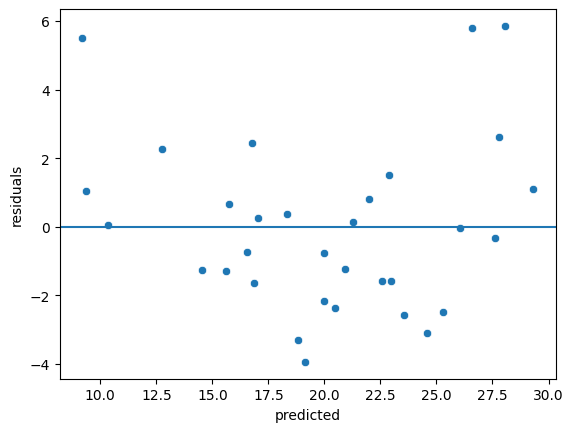

In [111]:
sns.scatterplot(data=dfE, x="predicted", y="residuals")
plt.axhline(y=0)
# these points should be scattered around center y=0 and not concentrated

In [ ]:
### Some Terms
Best Fit - The straight line in a plot that minimizes the divergence between related dispersed data points
Coefficient - Also known as a parameter, is the factor that is multiplied by a variable. A coefficient in linear regression represents changes in a Response Variable 
Coefficient of Determination - It is the correlation coefficient. In a regression, this term is used to define the precision or degree of fit
Correlation - the measurable intensity and degree of association between two variables, often known as the 'degree of correlation.' The values range from -1.0 to 1.0
Dependent Feature - A variable represented as y in the slope equation y=ax+b. Also referred to as an Output or a Response
Estimated Regression Line - the straight line that best fits a set of randomly distributed data points
Independent Feature - a variable represented by the letter x in the slope equation y=ax+b. Also referred to as an Input or a predictor
Intercept - It is the point at where the slope intersects the Y-axis, indicated by the letter b in the slope equation y=ax+b
Least Squares - a method for calculating the best fit to data by minimizing the sum of the squares of the discrepancies between observed and estimated values
Mean - an average of a group of numbers; nevertheless, in linear regression, Mean is represented by a linear function
OLS (Ordinary Least Squares Regression) - sometimes known as Linear Regression.
Residual - the vertical distance between a data point and the regression line
Regression - is an assessment of a variable's predicted change in relation to changes in other variables
Regression Model - The optimum formula for approximating a regression 
Response Variables - This category covers both the Predicted Response (the value predicted by the regression) and the Actual Response (the actual value of the data point) 
Slope - the steepness of a regression line. The linear relationship between two variables may be defined using slope and intercept: y=ax+b
Simple linear regression - A linear regression with a single independent variable

In [76]:
# Train and split data
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('Train Set ', pd.concat([X_train, y_train], axis=1).shape)
print('Test Set ', pd.concat([X_test, y_test], axis=1).shape)

Train Set  (24, 3)
Test Set  (8, 3)


In [ ]:
lm.fit(X_train, y_train)